# Imports

In [1]:
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import requests
imgs = ['img1.gif', 'img2.jpg', 'img3.jpeg', 'img4.jpeg', 'img5.jpeg']

# Show images
Images are plotted, and pixel values are printed. Images are stored in a 3D matrix. The values are ranging from 0 to 255. The images are stored and concatenated along the 2nd dimension in the variable `big` for later calculations.

[[[ 69 121 168]
  [143 173 197]
  [143 173 197]
  ..., 
  [ 41 116 184]
  [ 41 116 184]
  [ 41 116 184]]

 [[156 177 188]
  [199 210 213]
  [199 210 213]
  ..., 
  [ 50 122 192]
  [ 57 130 195]
  [ 55 126 193]]

 [[149 178 202]
  [171 195 211]
  [147 182 209]
  ..., 
  [ 97 150 194]
  [154 183 209]
  [154 183 209]]

 ..., 
 [[ 45  55  52]
  [ 42  51  49]
  [ 40  46  42]
  ..., 
  [ 48  52  41]
  [ 45  55  52]
  [ 42  51  49]]

 [[ 40  43  35]
  [ 38  40  27]
  [ 50  53  37]
  ..., 
  [ 45  55  52]
  [ 34  34  27]
  [ 28  23  12]]

 [[ 52  59  42]
  [ 59  67  50]
  [ 60  70  44]
  ..., 
  [ 28  23  12]
  [ 28  23  12]
  [ 29  31  27]]]
[[[136 169 100]
  [121 147  74]
  [125 148  70]
  ..., 
  [255 254 255]
  [242 249 216]
  [250 255 235]]

 [[ 82 130  70]
  [ 93 138  69]
  [105 151  53]
  ..., 
  [255 255 255]
  [245 253 216]
  [252 255 232]]

 [[ 73 111  52]
  [ 96 140  81]
  [ 98 144  72]
  ..., 
  [254 254 252]
  [246 253 212]
  [249 255 225]]

 ..., 
 [[247 244 227]
  [253 247 225]


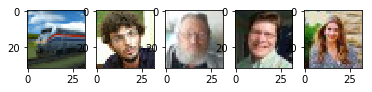

In [2]:
big = None
i = 1
for img in imgs:
    img = misc.imread(img)
    plt.subplot(150 + i)
    i += 1
    plt.imshow(img)
    print(img)
    if big is not None:
        big = np.concatenate((big, img), axis=1)
    else:
        big = img
plt.show()

# Mean

In [3]:
m = np.mean(big, axis=(0, 1))
print(m)

[ 128.31503906  122.85488281  112.91933594]


# Standard deviation

In [4]:
s = np.std(big, axis=(0, 1))
print(s)

[ 72.92711853  69.60544942  72.84755552]


# Data normalization
Broadcasting and subtracting the mean dividing with the std.

In [5]:
standard = (big - m) / s
imgs = np.split(standard, 5, 1)
print(len(imgs), imgs[1].shape)

5 (32, 32, 3)


# Audio file

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7221: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


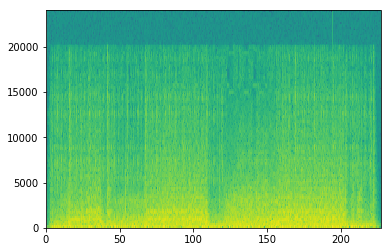

In [6]:
f, music = wavfile.read('Celtic-Music-Freedom-DASH.wav')
plt.specgram(music[:, 1], Fs=f)
plt.show()

# Download webpage

In [7]:
response = requests.get(' http://www.snopes.com/facebook-aideveloped-own-language')
html = response.text
print(html)

<!doctype html>
<html lang="en-US" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#">

<head><meta charset="utf-8">
<script>
        (function(window, document) {
            if (!window.__cmp) {
                window.__cmp = (function() {
                    var listen = window.attachEvent || window.addEventListener;
                    listen('message', function(event) {
                        window.__cmp.receiveMessage(event);
                    }, false);

                    function addLocatorFrame() {
                        if (!window.frames['__cmpLocator']) {
                            if (document.body) {
                                var frame = document.createElement('iframe');
                                frame.style.display = 'none';
                                frame.name = '__cmpLocator';
                                document.body.appendChild(frame);
                            } else {
                                setTimeout(addLocatorFrame, 5

# Plot letter count

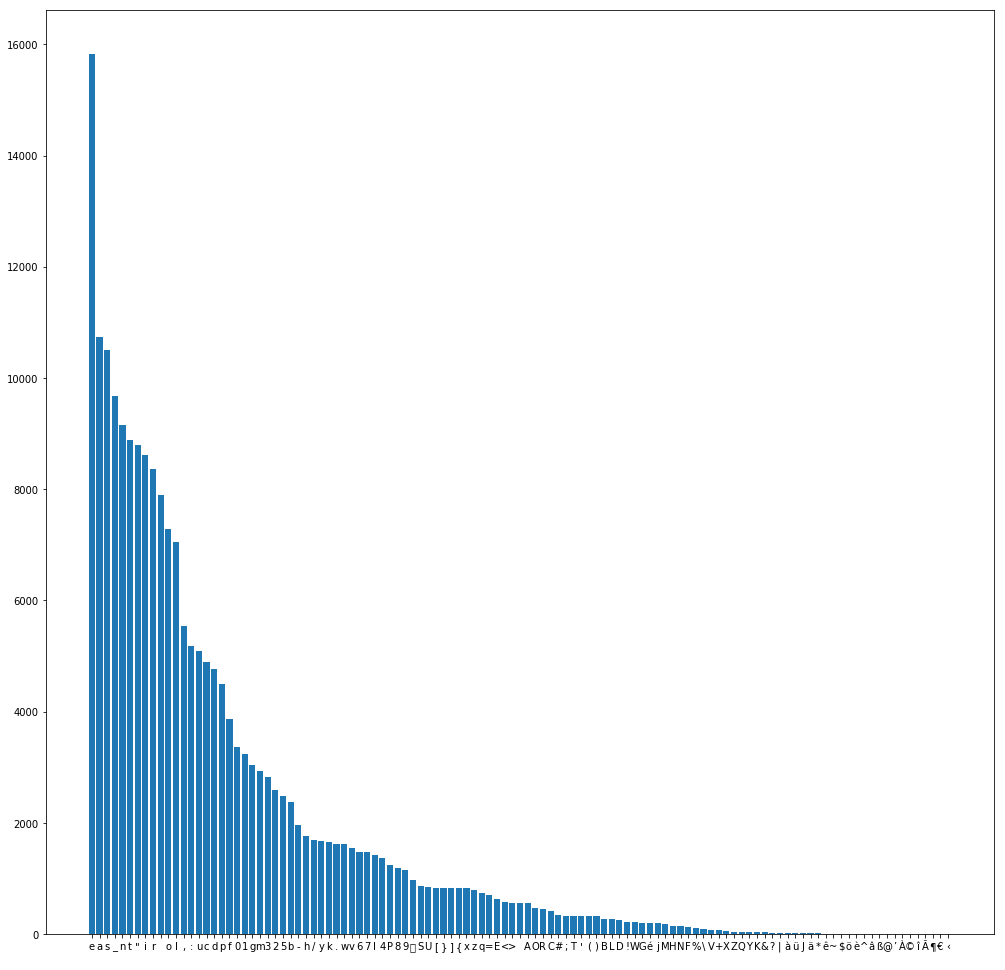

In [8]:
from collections import Counter
counts = Counter(html)
i = list(reversed(np.argsort(list(counts.values()))))
plt.figure(figsize=(17,17))
plt.bar(range(0, len(counts)), np.array(list(counts.values()))[i], tick_label=np.array(list(counts.keys()))[i])
plt.show()